In [1]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
path = '/content/drive/MyDrive/Computer Vision Masterclass - Udemy/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [3]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject13.centerlight.gif', 'subject14.happy.gif', 'subject02.surprised.gif', 'subject01.sleepy.gif', 'subject11.centerlight.gif', 'subject05.rightlight.gif', 'subject04.normal.gif', 'subject12.leftlight.gif', 'subject05.centerlight.gif', 'subject11.noglasses.gif', 'subject06.sleepy.gif', 'subject07.glasses.gif', 'subject06.normal.gif', 'subject06.noglasses.gif', 'subject01.sad.gif', 'subject04.noglasses.gif', 'subject02.normal.gif', 'subject12.surprised.gif', 'subject11.sad.gif', 'subject04.rightlight.gif', 'subject12.sad.gif', 'subject06.centerlight.gif', 'subject10.noglasses.gif', 'subject08.glasses.gif', 'subject01.glasses.gif', 'subject15.happy.gif', 'subject01.normal.gif', 'subject14.surprised.gif', 'subject08.noglasses.gif', 'subject06.surprised.gif', 'subject09.leftlight.gif', 'subject10.normal.gif', 'subject11.leftlight.gif', 'subject10.wink.gif', 'subject15.wink.gif', 'subject11.rightlight.gif', 'subject01.leftlight.gif', 'subject06.wink.gif', 'subject11.normal.gif', 'subje

In [4]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L') # L mode = single mode image (grayscale)
    image_np = np.array(image, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces


In [5]:
ids, faces = get_image_data()

In [6]:
ids

array([13, 14,  2,  1, 11,  5,  4, 12,  5, 11,  6,  7,  6,  6,  1,  4,  2,
       12, 11,  4, 12,  6, 10,  8,  1, 15,  1, 14,  8,  6,  9, 10, 11, 10,
       15, 11,  1,  6, 11,  3,  1, 15, 11, 10, 12,  9,  8,  6,  8,  2,  4,
        4,  8,  8, 14,  7, 11,  1,  2,  9,  7,  5,  5, 13,  7, 14,  8,  3,
       13, 10,  4,  7, 14,  2,  9,  8, 15, 12,  5,  4,  9,  8,  6,  2,  1,
       15,  7,  3, 15, 13, 15,  9, 12,  5, 13,  4,  7,  2, 14, 12,  7, 12,
        7, 14,  9, 13, 10, 15,  2,  6,  2, 13, 10,  5,  3, 13,  9,  1,  4,
        5,  3, 12, 14, 13,  3,  3, 11,  3, 10, 15,  5,  3,  9, 10, 14])

Training the classifier

In [7]:
#grid x and grid y = default value is 8
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

Prediction

In [8]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [9]:
test_image = '/content/yalefaces/test/subject10.sad.gif'

In [10]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')

In [11]:
image_np.shape

(243, 320)

In [12]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 6.384336446373091)

In [13]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject',''))
expected_output

10

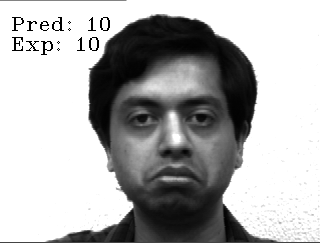

In [14]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), [10,30], cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), [10,50], cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

Evaluating Classifier

In [15]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))


  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [16]:
type(predictions)

list

In [17]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [18]:
expected_outputs

array([ 7,  4,  4,  1,  3,  8,  5, 10, 15,  6, 14,  6,  2, 12,  9, 11, 14,
        7,  5,  8, 13,  1, 15, 12, 11, 13,  3,  9,  2, 10])

In [19]:
predictions

array([ 9,  4,  9,  1,  3,  4,  5,  4, 15, 14, 14,  6,  4, 12,  7, 11, 14,
        7,  5,  8, 13,  1,  7, 12, 11, 13,  9,  9,  5, 10])

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(expected_outputs, predictions)

0.6666666666666666

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(expected_outputs, predictions)

<Axes: >

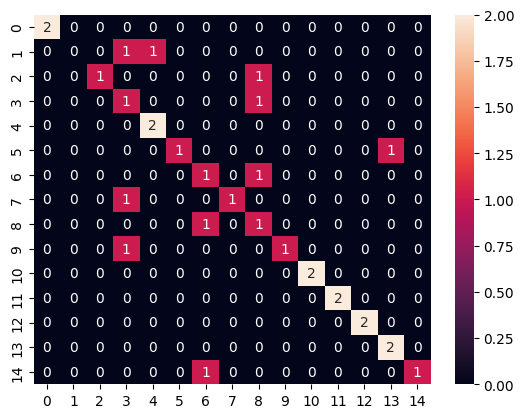

In [22]:
import seaborn

seaborn.heatmap(cm, annot= True)

Adjusting hyperparameters

In [32]:
#Default
# radius : 1
# neighbors : 8
# grid_x = 8
# grid_y = 8
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 5, neighbors = 13, grid_x = 8, grid_y = 8)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier_adjusted_parameters.yml')

lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier_adjusted_parameters.yml')

In [33]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject',''))


  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [34]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(expected_outputs, predictions)

0.6333333333333333